### Dataset cereales

En el siguiente dataset se encuentra información sobre diferentes cereales.

Las categorías en las columnas son:
       
   * **name** : Nombre del producto
   
   
   * **mfr** : Nombre del fabricante:
      * A = American Home Food Products
      * G = General Mills
      * K = Kelloggs
      * N = Nabisco
      * P = Post
      * Q = Quaker Oats
   
   
   *  **type**:
      * C = frío  
      * H = caliente 
        
   
   *  **calories**: calorias por porción
   *  **protein**:  gramos de proteinas
   *  **fat**:      gramos de grasa
   *  **sodium**:   miligramos de sodio
   *  **fiber**:    gramos de fibra dietética
   *  **arbo**:     gramos de azúcares complejos
   *  **sugars**:   gramos de azúcares simples
   *  **potass**:   miligramos de K
   *  **vitamins**: vitaminas y minerales - 0, 25, o 100, indicando el % recomendado por la FDA.
   *  **shelf**:    display shelf (1, 2, or 3, counting from the floor)
   *  **weight**:   peso en onzas de una porción
   *  **cups**:     numero de copas en una porción 
   *  **rating**:   clasificación de los cereales (Possibly from Consumer Reports?)
        
A partir de ésta información:
     
  * Caracterizar el tipo de dato de cada columna (_string, int, float_) y,
  * Reconocer el tipo variable (_continua, categórica_).

### Leer el Archivo 'cereal.csv'.

In [3]:
import pandas as pd
df = pd.read_csv("cereal.csv"
           , encoding = 'latin1')

#### Imprimir 5 muestras para reconocimiento de datos,  ¿Coinciden con las caracterizaciones realizadas?

In [4]:
df.sample(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
12,Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,19.823573
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
49,Nutri-Grain Almond-Raisin,K,C,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,40.692320
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.00,0.67,45.328074
33,Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3,90,25,3,1.00,0.25,53.371007


#### Tomar una columna categórica a elección y convertir en una variable dummie.

Se puede utilizar la función ```pd.get_dummies()```.


In [5]:
pd.get_dummies(df['mfr'])

,A,G,K,N,P,Q,R
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
72,0,1,0,0,0,0,0
73,0,1,0,0,0,0,0
74,0,0,0,0,0,0,1
75,0,1,0,0,0,0,0


##### Tomar la columna de fabricante, transformar a variable dummie y contar cuantos productos son de Kelloggs.

In [14]:
pd.get_dummies(df['mfr'])["K"].sum()

23

##### Ordenar los fabricantes por cantidad de productos en orden descendente y presentarlo en un gráfico.

In [23]:
df["mfr"].value_counts().sort_values(ascending = False)

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

C:\Users\ismenia.vilasis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


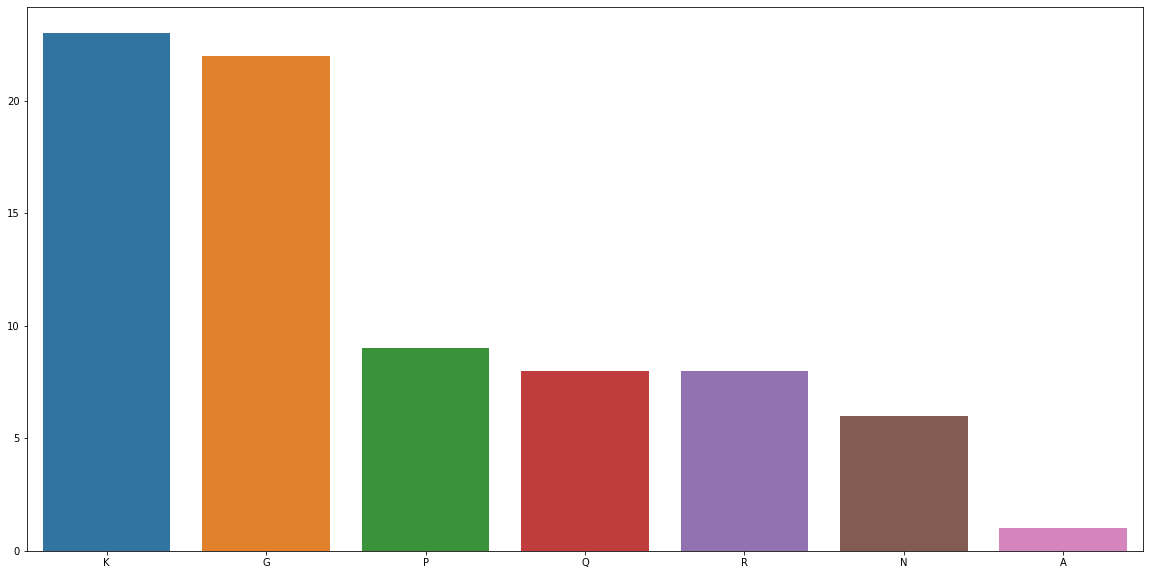

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

manf_sort = pd.get_dummies(df['mfr']).sum().sort_values(ascending = False)
plt.figure(figsize=(20,10))
sns.barplot(manf_sort.index,manf_sort.values)

plt.show()

##### La función ```pd.get_dummies()``` permite tomar mas de una columna, por ejemplo, utilizando slicing. 
##### Tomar las columnas 'mfr' y 'type',  y convertirlas en variables dummies simultáneamente, obtener una descripción de ese dataframe.